In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os
from sklearn.decomposition import PCA
from src.utils import find_ckpt_file, convert_to_tensor
import random
from src.envs.darkroom import DarkroomEnv
import networkx as nx
import matplotlib.pyplot as plt

# A few example Tree Mazes

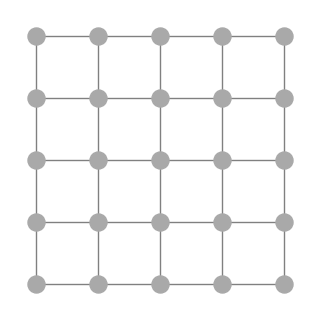

In [2]:
env = DarkroomEnv(
    maze_dim=5,
    horizon=400,
    state_dim=10,
    node_encoding_corr=0.
)

G = env.to_networkx()
pos = {node: node for node in G.nodes()}
plt.figure(figsize=(3,3))
nx.draw(G, pos,
       node_color='darkgray',
       node_size=150,
       font_size=8,
       font_weight='bold',
       edge_color='gray',
       width=1,
       alpha=1.)
plt.show()


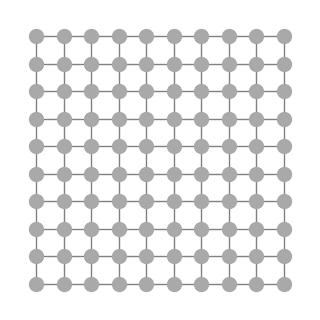

In [4]:
env = DarkroomEnv(
    maze_dim=10,
    horizon=400,
    state_dim=10,
    node_encoding_corr=0.
)

G = env.to_networkx()
pos = {node: node for node in G.nodes()}
plt.figure(figsize=(3,3))
nx.draw(G, pos,
       node_color='darkgray',
       node_size=100,
       font_size=8,
       font_weight='bold',
       edge_color='gray',
       width=1,
       alpha=1.)
plt.show()


In [26]:
samp_state = env.reset()
print(env.node_map_encoding_to_pos[tuple(samp_state)])
for _ in range(10):
    action = env.opt_action(samp_state)
    print(action)
    next_state, reward, done, _ = env.step(action)
    samp_state = next_state
    print(env.node_map_encoding_to_pos[tuple(next_state)])
    if reward == 1:
        break


(1, 0)
[1. 0. 0. 0. 0.]
(0, 0)
[0. 1. 0. 0. 0.]
(0, 1)
[0. 1. 0. 0. 0.]
(0, 2)
[0. 1. 0. 0. 0.]
(0, 3)
